In [1]:
%matplotlib inline
import openmc

In [2]:
am=openmc.Material(1,"am")

In [3]:
am.add_nuclide('Am242_m1',1)
am.add_nuclide('Am241',0)

In [4]:
am.set_density('g/cm3',12)
print(am)

Material
	ID             =	1
	Name           =	am
	Temperature    =	None
	Density        =	12 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	Am242_m1       =	1            [ao]
	Am241          =	0            [ao]



In [5]:
aerogel=openmc.Material(2,"Al2O3")

In [6]:
aerogel.add_nuclide('Al27',2.0)
aerogel.add_nuclide('O16',3.0)

In [7]:
aerogel.set_density('g/cm3',0.143)

In [8]:
vacuummat=openmc.Material(3,"Helium")

In [9]:
vacuummat.set_density('g/cm3',0.001)

In [10]:
vacuummat.add_nuclide('He4',1.0)

In [11]:
mats = openmc.Materials([am,aerogel,vacuummat])

In [12]:
mats.export_to_xml()

In [13]:
p1=openmc.ZPlane(z0=2,boundary_type='reflective')
p2=openmc.ZPlane(z0=0,boundary_type='reflective')
p3=openmc.YPlane(y0=0,boundary_type='vacuum')
p4=openmc.YPlane(y0=2,boundary_type='transmission')
p5=openmc.YPlane(y0=4,boundary_type='transmission')
p6=openmc.YPlane(y0=6,boundary_type='transmission')
p7=openmc.YPlane(y0=8,boundary_type='vacuum')

In [14]:
fuel_region=-p1 & +p2 & +p3 & -p4 
aerogel_region=-p1 & +p2 & +p5 & -p6

In [15]:
vacuum_region1= -p1 & +p2 & +p4 & -p5
vacuum_region2= -p1 & +p2 & +p6 & -p7

In [16]:
fuel=openmc.Cell(1,'fuel')
fuel.fill=am
fuel.region=fuel_region

aerogel_cell=openmc.Cell(2,'moderator')
aerogel_cell.fill=aerogel
aerogel_cell.region=aerogel_region

vacuum1=openmc.Cell(3,'vacuum')
vacuum1.fill=vacuummat
vacuum1.region=vacuum_region1


vacuum2=openmc.Cell(4,'vacuum2')
vacuum2.fill=vacuummat
vacuum2.region=vacuum_region2

In [17]:
root = openmc.Universe(cells=(fuel,aerogel_cell,vacuum1,vacuum2))

In [18]:
geom = openmc.Geometry()
geom.root_universe = root

In [19]:
point = openmc.stats.Point((0, 1, 1))
src = openmc.Source(space=point)
geom.export_to_xml()

In [20]:
settings = openmc.Settings()
settings.source = src
settings.batches = 300
settings.inactive = 10
settings.particles = 1000
settings.export_to_xml()

In [21]:
cell_filter = openmc.CellFilter([fuel,vacuum1,aerogel_cell,vacuum2])
t = openmc.Tally(1)
t.filters = [cell_filter]
t.scores = ['flux']


In [22]:

tallies = openmc.Tallies([t])
tallies.export_to_xml()

In [23]:
plot = openmc.Plot()
plot.basis = 'xy'
plot.origin = (0 ,4, 1)
plot.width = (100, 60)
plot.pixels = (1000, 600)

# Instantiate a Plots collection and export to "plots.xml"
plot_file = openmc.Plots([plot])
plot_file.export_to_xml()


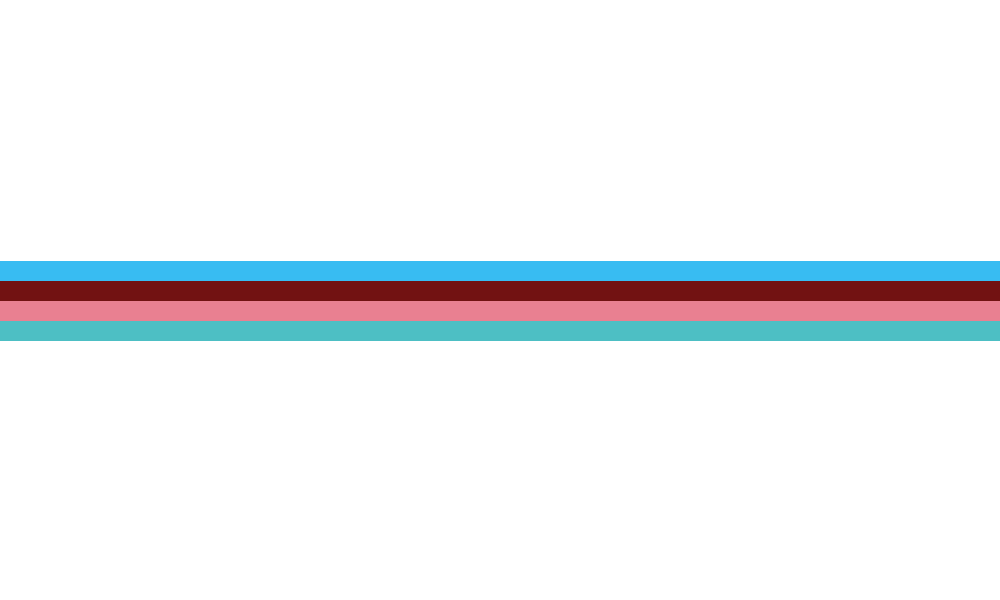

In [24]:
openmc.plot_inline(plot)

In [25]:
openmc.run()

openmc: Relink `/home/yichengz/anaconda3/bin/../lib/./libgfortran.so.4' with `/lib/x86_64-linux-gnu/librt.so.1' for IFUNC symbol `clock_gettime'

                               %%%%%%%%%%%%%%%
                          %%%%%%%%%%%%%%%%%%%%%%%%
                       %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                     %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                   %%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                ###############      %%%%%%%%%%%%%%%%%%%%%%%%
               ##################     %%%%%%%%%%%%%%%%%%%%%%%
               ###################     %%%%%%%%%%%%%%%%%%%%%%%
               ####################     %%%%%%%%%%%%%%%%%%%%%%
               #####################     %%%%%%%%%%%%%%%%%%%%%
               ######################     %%%%%%%%%%%%%%%%%%%%
               #################

      246/1    0.56501    0.57959 +/- 0.00131
      247/1    0.54411    0.57944 +/- 0.00131
      248/1    0.59197    0.57949 +/- 0.00130
      249/1    0.54982    0.57937 +/- 0.00130
      250/1    0.57481    0.57935 +/- 0.00130
      251/1    0.53045    0.57915 +/- 0.00131
      252/1    0.55427    0.57905 +/- 0.00131
      253/1    0.56937    0.57901 +/- 0.00130
      254/1    0.59991    0.57909 +/- 0.00130
      255/1    0.56862    0.57905 +/- 0.00130
      256/1    0.55918    0.57897 +/- 0.00129
      257/1    0.62097    0.57914 +/- 0.00130
      258/1    0.60029    0.57922 +/- 0.00130
      259/1    0.52714    0.57901 +/- 0.00131
      260/1    0.56235    0.57895 +/- 0.00130
      261/1    0.54579    0.57882 +/- 0.00131
      262/1    0.53491    0.57864 +/- 0.00131
      263/1    0.58148    0.57865 +/- 0.00131
      264/1    0.60386    0.57875 +/- 0.00131
      265/1    0.54829    0.57863 +/- 0.00131
      266/1    0.58610    0.57866 +/- 0.00130
      267/1    0.58446    0.57868 

0

In [26]:
!cat tallies.out


 ============================>     TALLY 1     <============================

 Cell 1
   Total Material
     Flux                                 2.80725        +/- 5.94334E-03
 Cell 3
   Total Material
     Flux                                 2.19085        +/- 1.30088E-02
 Cell 2
   Total Material
     Flux                                 2.06338        +/- 9.27509E-03
 Cell 4
   Total Material
     Flux                                 1.94733        +/- 1.13702E-02
